# Notebook contents: 

This notebook contains a lecture. The code for generating plots are found at the of the notebook. Links below.

- [presentation](#Session-1b:)
- [code for plots](#Code-for-plots)

# Session 13:
## Supervised learning, part 2

*Andreas Bjerre-Nielsen*

## Agenda
1. [model building](#Model-building) 
1. [model selection](#Model-selection) 
  - [cross validation](#Cross-validation)
  - [tools for selection](#Tools-for-model-selection)


## Vaaaamos

In [1]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns


# Recap from yesterday
Stuff about machine learning
- supervised vs non-supervised learning (having a target var or just unlabelled data)
- supervised types: regression problems vs classification problems
- Models
    - Perceptron
    - Adaline
    - Logistic Regression
    - Linear Regression
- We learned about optimization: gradient descent
- How can we say whether a model generalizes:
    - We split data randomly into training and testing data

## Supervised problems (1)
*What is the tradeoff for making supervised regression models?*

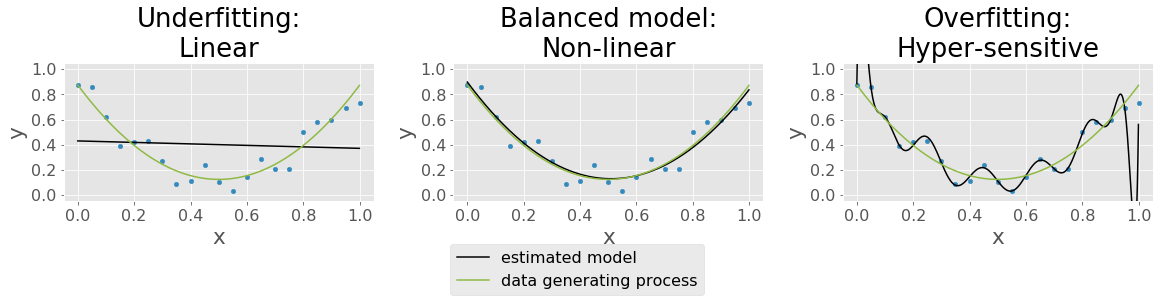

In [63]:
f_bias_var['regression'][2]

## Supervised problems (2)
*What was a remedy to overfitting in linear models? How do we measure overfitting?*

Regularization
- Too many irrelevant features - solved by L1 regularization ~ lasso
- Exploding coefficients - solved by L2 regularization ~ ridge

# Model building 

## Model pipelines (1)
*Is there a smart way to build ML models?*

Yes, we build a pipeline:
- From input (tidy) -> output
- Preprocessing data
    - Standard: adding polynomials, imputation, rescaling
    - Unsupervised learning (not this course)
- Supervised learning

## Model pipelines (2)
*How does the pipeline look? Is there data leakage?*


<center><img src='https://github.com/rasbt/python-machine-learning-book-2nd-edition/raw/master/code/ch06/images/06_01.png' alt="Drawing" style="width: 800px;"/></center>


## Model pipelines (3)
*What are the advantages of using a pipeline?*

- Ensures good practice - we only fit on training data. 
    - No leakage of data from train to test!
- Much less code!

data leakage: data from training data leaking to test data

## Applying a model pipeline (1)
*What would this look like in Python?*

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

pipe_preproc = make_pipeline(PolynomialFeatures(), 
                             StandardScaler())

print(pipe_preproc.steps[0])
print(pipe_preproc.steps[1])

('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C'))
('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True))


## Applying a model pipeline (2)
*Does this remind you of something?*

# YES!

### Method chaining from Pandas

## Applying a model pipeline (3)
*Let's some load Boston house price data*

In [4]:
from sklearn.datasets import load_boston
boston = load_boston()
# print(boston['DESCR'])
#print('\n'.join(load_boston()['DESCR'].split('\n')[12:26]))
X = boston.data #features
y = boston.target #target
X_train, X_test, y_train, y_test = train_test_split(X, y)

        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's


## Applying a model pipeline (4)
*And how do I apply the pipe on the data?*

In [5]:
pipe_preproc = make_pipeline(PolynomialFeatures(), 
                             StandardScaler()) # apply preproc - fit on train

#pipe_preproc.fit(X_train)
#X_train_prep = pipe_preproc.transform(X_train)
X_train_prep = pipe_preproc.fit_transform(X_train) # fits and then transforms training data
X_test_prep = pipe_preproc.transform(X_test) # transform test data

## Applying a model pipeline (5)
*What would it like look if we did use the pipe..?*

The more steps we have, the more code we save.

In [10]:
poly_trans = PolynomialFeatures()
scaler = StandardScaler()

# we call both transformations twice on both test and train
X_train_poly = poly_trans.fit_transform(X_train) 
X_test_poly = poly_trans.transform(X_test)

X_train_prep_alt = scaler.fit_transform(X_train_poly)
X_test_prep_alt = scaler.transform(X_test_poly)

# Model selection 


## Measuring the problem
*Does machine learning work out of the box?*

- In some cases ML works quite well out of the box.
- Often ML requires making careful choices.
    - Note that automated machine learning packages and services exist.
    - E.g. AutoML - this a hot research topic

*Which choices are to be made?*

- We need to pick model building **hyperparameters**.
- E.g. $\lambda$ for Lasso, Ridge.

## Model validation (1)
*How do we measure our model's performance for different hyperparameters?*

- Remember we cannot use the test set.

*Could we somehow mimick what we do with test data?*

- Yes, we can split the remaining non-test data into training and validation data:
    - we train model for various hyperparameters on training data;
    - pick the hyperparameters which performs best on validation data.

## Model validation (2)
*The non-test data is split into training and validation*


<center><img src='https://github.com/rasbt/python-machine-learning-book-2nd-edition/raw/master/code/ch06/images/06_02.png' alt="Drawing" style="width: 800px;"/></center>


**first "training set" incl. training and validation set, here is called "development set"**

## Model validation (3)
*What would this look like in Python?*

In [6]:
# splitting into development (2/3) and test data (1/3)
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=1/3, random_state=1)

# splitting development into train (1/3) and validation (1/3)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=1/2, random_state=1)

## Model validation (4)
Let's train a linear regression model

In [7]:
from sklearn.linear_model import Lasso, LinearRegression
pipe_lr = make_pipeline(PolynomialFeatures(include_bias=True), 
                        StandardScaler(),
                        LinearRegression())

pipe_lr.fit(X_dev, y_dev)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

## Model validation (5)
Let's find the  Lasso model which performs best in the validation set

In [9]:
from sklearn.metrics import mean_squared_error as mse

perform = [] # container where we put in our performance
lambdas = np.logspace(-4, 4, 33)
for lambda_ in lambdas:
    pipe_lasso = make_pipeline(PolynomialFeatures(include_bias=False), 
                               StandardScaler(),
                               Lasso(alpha=lambda_, random_state=1))
    pipe_lasso.fit(X_train, y_train) # fit on the training data
    y_pred = pipe_lasso.predict(X_val) # validate on the validation data
    perform.append(mse(y_pred, y_val))
    
hyperparam_perform = pd.Series(perform,index=lambdas)

optimal = hyperparam_perform.nsmallest(1)    
print('Optimal alpha:', optimal.index[0])
print('Validation MSE: %.3f' % optimal.values[0])

Optimal alpha: 0.01
Validation MSE: 18.421


## Model validation (6)
Let's compare the performance of the Lasso vs. Linear Regression

In [10]:
# insert optimal lambda into new model
pipe_lasso = make_pipeline(PolynomialFeatures(include_bias=False), # make a new pipe and put in the optimal hyperparameter
                           StandardScaler(),
                           Lasso(alpha=optimal.index[0])) # alpha in sklearn is lambda

# fit new model on all of the development (non-test) data
pipe_lasso.fit(X_dev,y_dev)

# compare model performance on test data
print('Lasso', round(mse(pipe_lasso.predict(X_test),y_test), 3))
print('LinReg', round(mse(pipe_lr.predict(X_test),y_test), 3))

Lasso 12.399
LinReg 21.318


## Bias and variance (1)
*How do we describe the modelling error?*

From [Wikipedia](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff) yesterday:

- model **bias**: _an error from erroneous assumptions in the learning algorithm_
  - high bias can cause an algorithm to miss the relevant relations between features and target outputs (**underfitting**)
   

- model **variance**: _an error from sensitivity to small fluctuations in the training set_
  -  high variance can cause an algorithm to model the random noise in the training data, rather than the intended outputs (**overfitting**).
 

## Bias and variance (2)
*So what is overfitting?*

Overfitting is: low bias / high variance

- traning our model captures all patterns but we also find some irrelevant
- reacts too much to training sample errors 
    - some errors are just noise, and thus we find too many spurious relations 
- examples of causes: 
    - too much polynomial expansion of variables (`PolynomialFeatures`)
    - non-linear/logistic without properly tuned hyperparameters: 
        - Decision Trees, Support Vector Machines or Neural Networks

## Bias and variance (3)
*So what is underfitting?*

Underfitting is: high bias / low variance
- oversimplification of models, cannot approximate all patterns found
- examples of causes: 
    - linear and logistic regression (without polynomial expansion)

## Bias and variance (4)
*Not so fast.. OLS is unbiased, right?*

Yes, OLS is unbiased. But...?

- But .. only by assumption..
    - Requires we know the true form of the model. 
        - However, we never know do..

*What happens if we introduce regularization?*
- Then model is no longer unbiased.
    - (if we assume the model is true)

## Smarter validation
*Is this approach the smartest way for deciding on choice of hyperparameters?*

# NO


Our model choice depends a lot on which sample we pick. Could we use more of the data?

# Cross validation


## The holdout method
*How do we got the more out of the data?*

We reuse the data in the development set repeatedly
- We test on all the data
- Rotate which parts of data is used for test and train.

## Leave-one-out CV
*How do we got the most of the data?*

The most robust approach
- Each single observation in the training data we use the remaining data to train.
- Makes number of models equal to the number of observations
- Very computing intensive - does not scale!
LOOCV

## K fold method (1)
*How do balance computing time vs. overfitting?*

We split the sample into $K$ even sized test bins.
- For each test bin $k$ we use the remaining data for training.

Advantages:
- We use all our data for testing.
- Training is done with 100-(100/K) pct. of the data, i.e. 90 pct. for K=10.

**can be used for both development dataset (so training and validation splitting) and for train and test plit**

## K fold method (2)
In K-fold cross validation we average the errors.

<center><img src='https://github.com/rasbt/python-machine-learning-book-2nd-edition/raw/master/code/ch06/images/06_03.png' alt="Drawing" style="width: 1100px;"/></center>

## K fold method (3)
*How would we use K-fold cross validation to select our model?*

We compute MSE for every lambda and every fold (nested for loop)

In [13]:
from sklearn.model_selection import KFold
kfolds = KFold(n_splits=10)
folds = kfolds.split(X_dev, y_dev)

# outer loop: lambdas
mseCV = []
for lambda_ in lambdas:    
    # inner loop: folds
    mseCV_ = []    
    for train_idx, val_idx in folds:       # for each split we make, make a model 
        # train model and compute MSE on test fold
        pipe_lassoCV = make_pipeline(PolynomialFeatures(degree=3, include_bias=True),
                                     StandardScaler(),
                                     Lasso(alpha=lambda_, random_state=1))            
        X_train, y_train, = X_dev[train_idx], y_dev[train_idx]
        X_val, y_val = X_dev[val_idx], y_dev[val_idx] 
        pipe_lassoCV.fit(X_train, y_train)        #first we fit model on training data
        mseCV_.append(mse(pipe_lassoCV.predict(X_val), y_val))   #then we predict the validation set 
        
    # store result    
    mseCV.append(mseCV_) 
    
# convert to DataFrame
lambdaCV = pd.DataFrame(mseCV, index=lambdas)
lambdaCV.head()
lambdaCV.mean(axis=1)

0         1         2          3         4          5  \
0.000100  21.635033  4.204362  99.60176  68.436668  17.10485  22.763013   
0.000178        NaN       NaN       NaN        NaN       NaN        NaN   
0.000316        NaN       NaN       NaN        NaN       NaN        NaN   
0.000562        NaN       NaN       NaN        NaN       NaN        NaN   
0.001000        NaN       NaN       NaN        NaN       NaN        NaN   

                  6          7          8         9  
0.000100  19.905468  28.411331  14.767651  17.42069  
0.000178        NaN        NaN        NaN       NaN  
0.000316        NaN        NaN        NaN       NaN  
0.000562        NaN        NaN        NaN       NaN  
0.001000        NaN        NaN        NaN       NaN

# K fold method (4)
Training the model with optimal hyperparameters and compare MSE

In [14]:
# choose optimal hyperparameters 
optimal_lambda = lambdaCV.mean(axis=1).nsmallest(1)

# retrain model/re-estimate using optimal hyperparameters
pipe_lassoCV = make_pipeline(PolynomialFeatures(include_bias=False), 
                             StandardScaler(),
                             Lasso(alpha=optimal_lambda.index[0], random_state=1))
pipe_lassoCV.fit(X_dev,y_dev)

# compare performance
models = {'Lasso': pipe_lasso, 'Lasso CV': pipe_lassoCV, 'LinReg': pipe_lr}
for name, model in models.items():
    score = mse(model.predict(X_test),y_test)
    print(name, round(score, 2))

Lasso 12.4
Lasso CV 14.13
LinReg 21.32


## K fold method (5)
*What else could we use cross-validation for?*

- Getting more evaluations of our model performance.
- We can cross validate at two levels:
    - Outer: we make multiple splits of test and train/dev.
    - Inner: within each train/dev. dataset we make cross validation to choose hyperparameters

## Learning curves (1)
*What does a balanced model look like?*

<center><img src='https://github.com/rasbt/python-machine-learning-book-2nd-edition/raw/master/code/ch06/images/06_04.png' alt="Drawing" style="width: 800px;"/></center>

## Learning curves (2)

In [17]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = \
    learning_curve(estimator=pipe_lasso,
                   X=X_train,
                   y=y_train,
                   train_sizes=np.arange(0.2, 1.05, .05),
                   scoring='neg_mean_squared_error',                 
                   cv=3)
    
mse_ = pd.DataFrame({'Train':-train_scores.mean(axis=1),
                     'Test':-test_scores.mean(axis=1)})\
        .set_index(pd.Index(train_sizes,name='sample size'))    
print(mse_.head(3))
#train_scores

                Train        Test
sample size                      
40           0.836417   67.617824
50           1.343929  103.111180
60           1.592246   52.207788


## Learning curves (3)

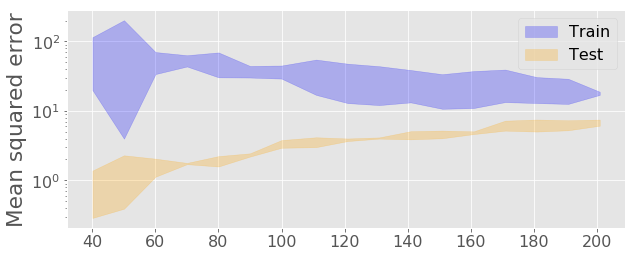

In [53]:
f_learn, ax = plt.subplots(figsize=(10,4))
ax.fill_between(train_sizes,
                -test_scores.mean(1) + test_scores.std(1)*1.96,
                -test_scores.mean(1) - test_scores.std(1)*1.96, 
                alpha=0.25, label ='Train', color='blue')

ax.fill_between(train_sizes,
                -train_scores.mean(1) + train_scores.std(1)*1.96,
                -train_scores.mean(1) - train_scores.std(1)*1.96, 
                alpha=0.25, label='Test', color='orange')
ax.set_ylabel('Mean squared error')
ax.set_yscale('log')
ax.legend()

## Learning curves (4)

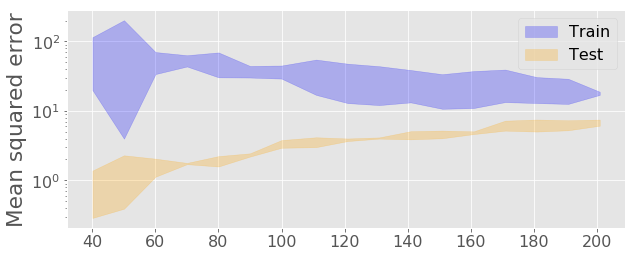

In [54]:
f_learn

# Tools for model selection

## Validation curves (1)

In [55]:
from sklearn.model_selection import validation_curve

train_scores, test_scores = \
    validation_curve(estimator=pipe_lasso,
                     X=X_train,
                     y=y_train,
                     param_name='lasso__alpha',
                     param_range=lambdas,
                     scoring='neg_mean_squared_error',                 
                     cv=3)

mse_score = pd.DataFrame({'Train':-train_scores.mean(axis=1),
                          'Validation':-test_scores.mean(axis=1),
                          'lambda':lambdas})\
              .set_index('lambda')   
print(mse_score.Validation.nsmallest(1))

lambda
0.017783    17.207944
Name: Validation, dtype: float64


## Validation curves (2)

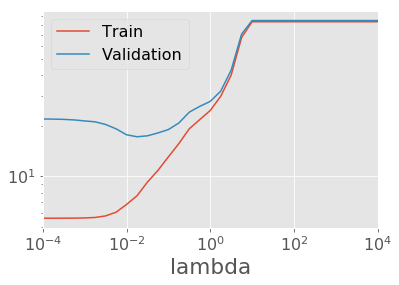

In [56]:
mse_score.plot(logx=True, logy=True)

**choose the optimal hyperparameter by taking the lowest point on the validation dataset**

## Grid search (1)
*How do we search for two or more optimal parameters? (e.g. elastic net)*

search in multiple dimensions at a time

- Goal: find the optimal parameter combination: $$\lambda_1^*,\lambda_2^*=\arg\min_{\lambda_1,\lambda_2}MSE^{CV}(X_{train},y_{train})$$

- Option 1: We can loop over the joint grid of parameters.
  - One level for each parameter.
  - Caveats:

- Option 2: sklearn has `GridSearchCV` has a tool which tests all parameter combinations.

## Grid search (2)
*How does this look in Python?*

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
pipe_el = make_pipeline(PolynomialFeatures(include_bias=False), 
                        StandardScaler(),
                        ElasticNet())
gs = GridSearchCV(estimator=pipe_el, 
                  param_grid={'elasticnet__alpha':np.logspace(-4,4,10)*2, # lambda
                              'elasticnet__l1_ratio':np.linspace(0,1,10)},  # l1 ratio
                  scoring='neg_mean_squared_error', # gridsearch is a maximizer, so since we want to minimize, take a neg. MSE
                  n_jobs=4, # makes your computation faster
                  iid=False,
                  cv=10)

- Notation: double underscore between estimator and hyperparameter, e.g. 'est__hyperparam' 
- Scoring: negative MSE as we're maximizing the score ~ minimize MSE.

## Grid search (3)
*What does the grid search yield?*

In [19]:
models['ElasicNetCV'] = gs.fit(X_train, y_train)
for name, model in models.items():
    score = mse(model.predict(X_test),y_test)
    print(name, round(score, 2))
print()
print('CV params:', gs.best_params_) # elastic net outperforms the others even though it is more general

Lasso 12.4
Lasso CV 14.13
LinReg 21.32
ElasicNetCV 12.17

CV params: {'elasticnet__alpha': 0.011989685006378818, 'elasticnet__l1_ratio': 0.7777777777777777}


## Grid search (4)
*What if we have 10,000 parameter combinations?*

- Option 1: you buy a cluster on Amazon, learn how to parallelize across computers. 

- Option 2: you drop some of the parameter values

- Option 3: `RandomizedSearchCV` searches a subset of the combinations.

# The end
[Return to agenda](#Agenda)

# Code for plots

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rcParams['figure.figsize'] = 10, 4 # set default size of plots

### Plots of ML types

In [ ]:
%run ../ML_plots.ipynb